Installing Packages

In [3]:
pip install librosa

In [4]:
pip install soundfile

In [5]:
pip install numpy

In [6]:
!apt install libasound2-dev portaudio19-dev libportaudio2 libportaudiocpp0 ffmpeg


Reading package lists... Done
Building dependency tree       
Reading state information... Done
libasound2-dev is already the newest version (1.1.3-5ubuntu0.5).
ffmpeg is already the newest version (7:3.4.8-0ubuntu0.2).
Suggested packages:
  portaudio19-doc
The following NEW packages will be installed:
  libportaudio2 libportaudiocpp0 portaudio19-dev
0 upgraded, 3 newly installed, 0 to remove and 16 not upgraded.
Need to get 184 kB of archives.
After this operation, 891 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libportaudio2 amd64 19.6.0-1 [64.6 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libportaudiocpp0 amd64 19.6.0-1 [15.1 kB]
Get:3 http://archive.ubuntu.com/ubuntu bionic/universe amd64 portaudio19-dev amd64 19.6.0-1 [104 kB]
Fetched 184 kB in 1s (310 kB/s)
Selecting previously unselected package libportaudio2:amd64.
(Reading database ... 145483 files and directories currently installed.)
Preparing to 

In [7]:
pip install pyaudio

  Created wheel for pyaudio: filename=PyAudio-0.2.11-cp36-cp36m-linux_x86_64.whl size=51617 sha256=633c20d53ab303a9ffa3e1f3fd5690f5a74c92553d6c493a423eb5019b55252c
  Stored in directory: /root/.cache/pip/wheels/f4/a8/a4/292214166c2917890f85b2f72a8e5f13e1ffa527c4200dcede
Successfully built pyaudio


In [8]:
pip install --upgrade tensorflow


Requirement already up-to-date: tensorflow in /usr/local/lib/python3.6/dist-packages (2.4.0)


Importing Libraries

In [9]:
import os
import random
import sys


## Package
import glob 
import keras
import IPython.display as ipd
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotly.graph_objs as go
import plotly.offline as py
import plotly.tools as tls
import seaborn as sns
from scipy.io.wavfile import read
import tensorflow as tf
py.init_notebook_mode(connected=True)
#import soundfile as sf


## Keras
from keras import regularizers
from keras.callbacks import ModelCheckpoint, LearningRateScheduler, EarlyStopping
from keras.callbacks import  History, ReduceLROnPlateau, CSVLogger
from keras.models import Model, Sequential
from keras.layers import Dense, Embedding, LSTM
from keras.layers import Input, Flatten, Dropout, Activation, BatchNormalization
from keras.layers import Conv1D, MaxPooling1D, AveragePooling1D,Conv2D,MaxPooling2D
from keras.preprocessing import sequence
from keras.preprocessing.sequence import pad_sequences
from keras.preprocessing.text import Tokenizer
from keras.utils import np_utils
from keras.utils import to_categorical
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras import Input, layers
from tensorflow.keras import backend as K
#from tensorflow.python.keras.optimizers import Adam,SGD

## Sklearn
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedShuffleSplit



## Rest
from scipy.fftpack import fft
from scipy import signal
from scipy.io import wavfile
from tqdm import tqdm

input_duration=3
# % pylab inline

In [10]:
# Data Directory
# Please edit according to your directory change.
%pwd

!ls -l

total 8
drwx------ 4 root root 4096 Jan  7 19:21 drive
drwxr-xr-x 1 root root 4096 Jan  6 18:10 sample_data


Reading the label data

In [12]:
dir_list = os.listdir("/content/drive/MyDrive/PythonCode")
dir_list.sort()
print (dir_list)

['amused', 'anger', 'disgust', 'neutral', 'sleepiness']


Plotting the audio file's waveform and spectogram

In [13]:
for file in glob.glob("/content/drive/MyDrive/PythonCode/amused/*.wav"):
        file_name=os.path.basename(file)
        print(file_name)

amused_393-420_0404_sam.wav
amused_393-420_0405_sam.wav
amused_393-420_0410_sam.wav
amused_393-420_0413_sam.wav
amused_393-420_0411_sam.wav
amused_393-420_0414_sam.wav
amused_393-420_0408_sam.wav
amused_393-420_0416_sam.wav
amused_393-420_0399_sam.wav
amused_393-420_0409_sam.wav
amused_421-448_0430_sam.wav
amused_421-448_0432_sam.wav
amused_421-448_0426_sam.wav
amused_421-448_0428_sam.wav
amused_421-448_0433_sam.wav
amused_421-448_0431_sam.wav
amused_421-448_0421_sam.wav
amused_421-448_0429_sam.wav
amused_421-448_0427_sam.wav
amused_421-448_0425_sam.wav
amused_421-448_0436_sam.wav
amused_393-420_0420_sam.wav
amused_421-448_0422_sam.wav
amused_421-448_0424_sam.wav
amused_421-448_0438_sam.wav
amused_421-448_0423_sam.wav
amused_421-448_0434_sam.wav
amused_421-448_0435_sam.wav
amused_421-448_0437_sam.wav
amused_449-476_0457_sam.wav
amused_449-476_0453_sam.wav
amused_421-448_0447_sam.wav
amused_449-476_0458_sam.wav
amused_449-476_0454_sam.wav
amused_421-448_0441_sam.wav
amused_449-476_0450_

Selecting Single Audio file

In [14]:
if file:
                    
    filename = file_name[:]
    print("single file", filename)

single file amused_29-56_0054_jenie.wav


In [15]:
[samples, sample_rate] = librosa.load(file)
sample_rate, samples

(22050, array([ 3.2928372e-03,  1.3920234e-04,  1.2291792e-03, ...,
         2.5143826e-04, -1.9937452e-05,  0.0000000e+00], dtype=float32))

In [16]:
len(samples), sample_rate

(57397, 22050)

Spectrogram

In [17]:
def log_specgram(audio, sample_rate, window_size=20,
                 step_size=10, eps=1e-10):
    nperseg = int(round(window_size * sample_rate / 1e3))
    noverlap = int(round(step_size * sample_rate / 1e3))
    freqs, times, spec = signal.spectrogram(audio,
                                    fs=sample_rate,
                                    window='hann',
                                    nperseg=nperseg,
                                    noverlap=noverlap,
                                    detrend=False)
    return freqs, times, np.log(spec.T.astype(np.float32) + eps)



In [18]:
sample_rate/ len(samples)

0.38416641984772726

Plotting waveform and spectogram

Text(0.5, 0, 'Seconds')

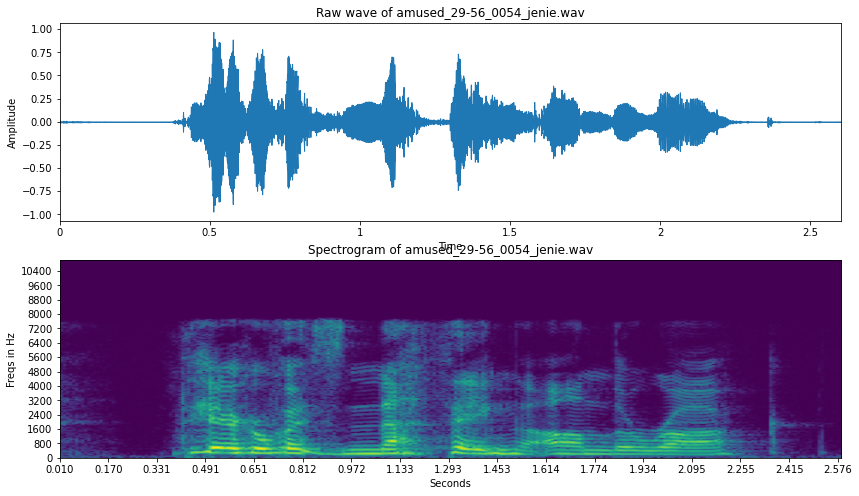

In [19]:
# Plotting Wave Form and Spectrogram
freqs, times, spectrogram = log_specgram(samples, sample_rate)

fig = plt.figure(figsize=(14, 8))
ax1 = fig.add_subplot(211)
ax1.set_title('Raw wave of ' + filename)
ax1.set_ylabel('Amplitude')
librosa.display.waveplot(samples, sr=sample_rate)

ax2 = fig.add_subplot(212)
ax2.imshow(spectrogram.T, aspect='auto', origin='lower', 
           extent=[times.min(), times.max(), freqs.min(), freqs.max()])
ax2.set_yticks(freqs[::16])
ax2.set_xticks(times[::16])
ax2.set_title('Spectrogram of ' + filename)
ax2.set_ylabel('Freqs in Hz')
ax2.set_xlabel('Seconds')

Mean and standard deviation

In [20]:
mean = np.mean(spectrogram, axis=0)
std = np.std(spectrogram, axis=0)
spectrogram = (spectrogram - mean) / std

Trimming of audio file

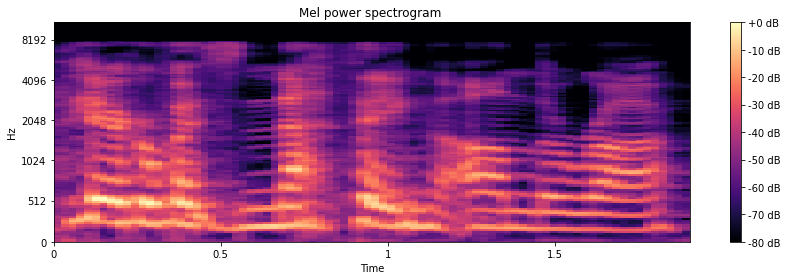

In [21]:
# Trim the silence voice
aa , bb = librosa.effects.trim(samples, top_db=30)
aa, bb

# Plotting Mel Power Spectrogram
S = librosa.feature.melspectrogram(aa, sr=sample_rate, n_mels=128)
# Convert to log scale (dB). We'll use the peak power (max) as reference.
log_S = librosa.power_to_db(S, ref=np.max)

plt.figure(figsize=(12, 4))
librosa.display.specshow(log_S, sr=sample_rate, x_axis='time', y_axis='mel')
plt.title('Mel power spectrogram ')
plt.colorbar(format='%+02.0f dB')
plt.tight_layout()

Plotting MFCC of audio

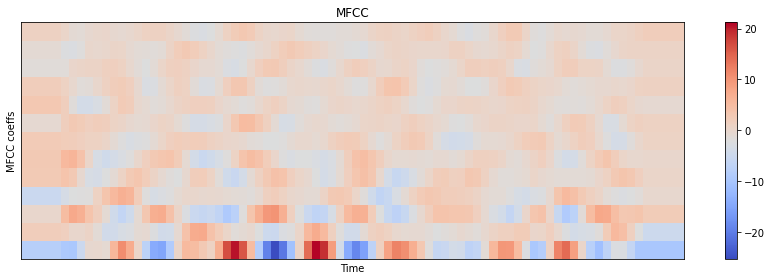

In [22]:
# Plotting MFCC
mfcc = librosa.feature.mfcc(S=log_S, n_mfcc=13)

# Let's pad on the first and second deltas while we're at it
delta2_mfcc = librosa.feature.delta(mfcc, order=2)

plt.figure(figsize=(12, 4))
librosa.display.specshow(delta2_mfcc)
plt.ylabel('MFCC coeffs')
plt.xlabel('Time')
plt.title('MFCC')
plt.colorbar()
plt.tight_layout()

Play of original audio file

In [23]:
# Original Sound
ipd.Audio(samples, rate=sample_rate)

Play of trimmed audio file

In [24]:
# Silence trimmed Sound by librosa.effects.trim()
ipd.Audio(aa, rate=sample_rate)

Manual trimming of audio file

In [25]:
# Silence trimmed Sound by manual trimming
samples_cut = samples[10000:-12500]
ipd.Audio(samples_cut, rate=sample_rate)

In [26]:
def plot_time_series(data):
    """
    Plot the Audio Frequency.
    """
    fig = plt.figure(figsize=(14, 8))
    plt.title('Raw wave ')
    plt.ylabel('Amplitude')
    plt.plot(np.linspace(0, 1, len(data)), data)
    plt.show()


In [27]:
def noise(data):
    """
    Adding White Noise.
    """
    noise_amp = 0.005*np.random.uniform()*np.amax(data)
    data = data.astype('float64') + noise_amp * np.random.normal(size=data.shape[0])
    return data

In [28]:
def shift(data):
    """
    Random Shifting.
    """
    s_range = int(np.random.uniform(low=-5, high = 5)*500)
    return np.roll(data, s_range)

In [29]:
def stretch(data, rate=0.8):
    """
    Streching the Sound.
    """
    data = librosa.effects.time_stretch(data, rate)
    return data

In [30]:
def pitch(data, sample_rate):
    """
    Pitch Tuning.
    """
    bins_per_octave = 12
    pitch_pm = 2
    pitch_change =  pitch_pm * 2*(np.random.uniform())   
    data = librosa.effects.pitch_shift(data.astype('float64'), 
                                      sample_rate, n_steps=pitch_change, 
                                      bins_per_octave=bins_per_octave)
    return data

In [31]:
def dyn_change(data):
    """
    Random Value Change.
    """
    dyn_change = np.random.uniform(low=1.5,high=3)
    return (data * dyn_change)

In [32]:
def speedNpitch(data):
    """
    peed and Pitch Tuning.
    """
    # you can change low and high here
    length_change = np.random.uniform(low=0.8, high = 1)
    speed_fac = 1.0  / length_change
    tmp = np.interp(np.arange(0,len(data),speed_fac),np.arange(0,len(data)),data)
    minlen = min(data.shape[0], tmp.shape[0])
    data *= 0
    data[0:minlen] = tmp[0:minlen]
    return data


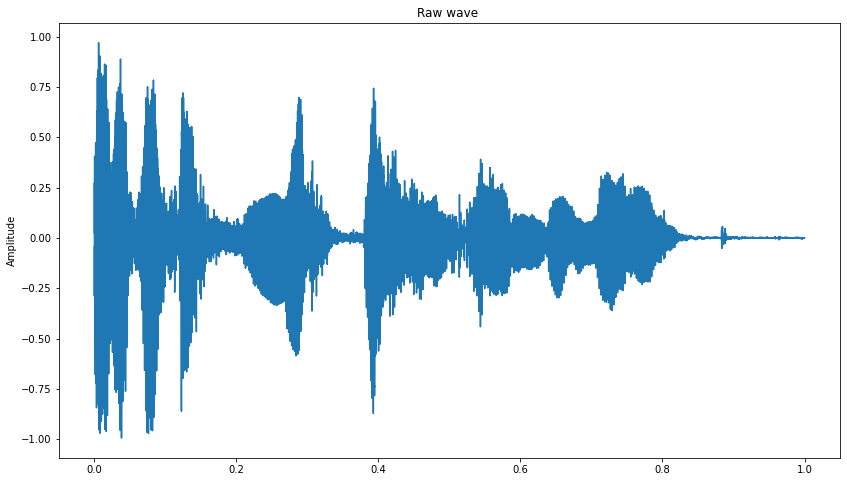

In [33]:
X, sample_rate = librosa.load(file, res_type='kaiser_fast',duration=4,sr=22050*2,offset=0.5)
plot_time_series(X)

In [34]:
ipd.Audio(X, rate=sample_rate)


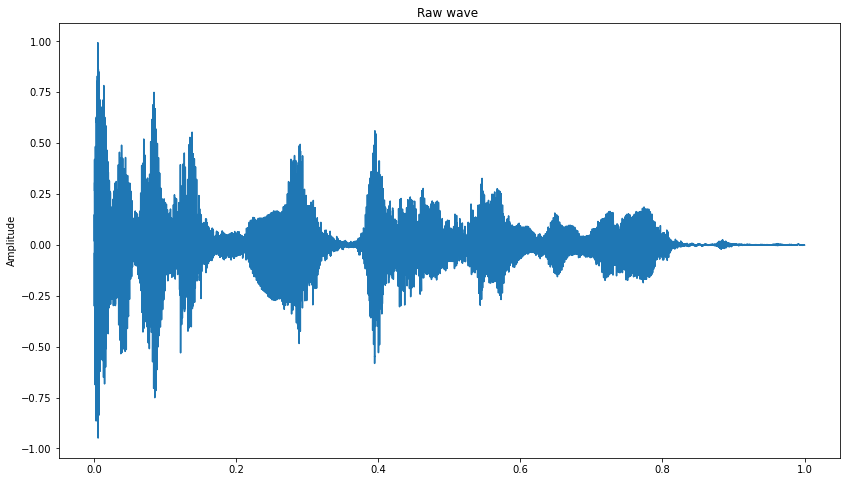

In [35]:
x = pitch(X, sample_rate)
plot_time_series(x)
ipd.Audio(x, rate=sample_rate)


Considering all the emotions from the dataset

In [36]:
emotions = {
    "amused": "amused",
    "anger": "anger",
    "Disgust": "Disgust",
    "neutral": "neutral",
    "sleepiness": "sleepiness",
}

Selecting the emotions needed to predict - Labelled data

In [37]:
observed_emotions = ['amused','anger','Disgust','sleepiness','neutral']

Importing libraries

In [38]:
import soundfile # to read audio file
import numpy as np
import librosa # to extract speech features
import glob
import os
import pickle # to save model after training
from sklearn.model_selection import train_test_split # for splitting training and testing
from sklearn.neural_network import MLPClassifier # multi-layer perceptron model
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_validate

feature extraction method

In [39]:
def extract_feature(file_name, mfcc, chroma, mel):
    with soundfile.SoundFile(file_name) as sound_file:
        X = sound_file.read(dtype="float32")
        sample_rate=sound_file.samplerate   
        #samplerate = sample_rate
        #print(samplerate)
        if chroma:
            stft=np.abs(librosa.stft(X))
        result=np.array([])
        if mfcc:
            mfccs=np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=40).T, axis=0)
            result=np.hstack((result, mfccs))
        if chroma:
            chroma=np.mean(librosa.feature.chroma_stft(S=stft, sr=sample_rate).T,axis=0)
            result=np.hstack((result, chroma))
        if mel:
            mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
            result=np.hstack((result, mel))
        return result

Splitting of data

In [40]:
x,y=[],[]
def load_data(test_size=0.2):
    
    for file in glob.glob("/content/drive/MyDrive/PythonCode/*/*.wav"):
        file_name=os.path.basename(file)
       
        #audio = len(file_name)
        print(file_name)

        emotion=emotions[file_name.split("_")[0]]
        #print(emotion)
        if emotion not in observed_emotions:
            continue
        feature=extract_feature(file, mfcc=True, chroma=True, mel=True)
        #print(audio)
        x.append(feature)
        y.append(emotion)
        
    return train_test_split(np.array(x), y, test_size=test_size, random_state=9)
x_train,x_test,y_train,y_test=load_data(test_size=0.25)

Streaming output truncated to the last 5000 lines.
amused_253-280_0265_bea.wav
amused_253-280_0264_bea.wav
amused_253-280_0272_bea.wav
amused_253-280_0271_bea.wav
amused_253-280_0269_bea.wav
amused_253-280_0278_bea.wav
amused_253-280_0266_bea.wav
amused_253-280_0277_bea.wav
amused_253-280_0267_bea.wav
amused_281-308_0296_bea.wav
amused_281-308_0288_bea.wav
amused_281-308_0291_bea.wav
amused_281-308_bea.wav
amused_281-308_0284_bea.wav
amused_281-308_0286_bea.wav
amused_281-308_0282_bea.wav
amused_281-308_0292_bea.wav
amused_281-308_0285_bea.wav
amused_281-308_0294_bea.wav
amused_281-308_0287_bea.wav
amused_281-308_0283_bea.wav
amused_281-308_0289_bea.wav
amused_281-308_0290_bea.wav
amused_281-308_0293_bea.wav
amused_281-308_0295_bea.wav
amused_281-308_0281_bea.wav
amused_29-45_bea.wav
amused_281-308_0297_bea.wav
amused_281-308_0308_bea.wav
amused_29-45_0030_bea.wav
amused_281-308_0299_bea.wav
amused_281-308_0305_bea.wav
amused_281-308_0300_bea.wav
amused_281-308_0301_bea.wav
amused_281-

Count of values of labelled data

In [41]:
#print (y.count['amused','anger','Disgust','sleepiness','neutral'])
[[x,y.count(x)] for x in set(y)]

[['Disgust', 684],
 ['sleepiness', 1742],
 ['neutral', 1583],
 ['anger', 1306],
 ['amused', 1328]]

In [42]:
#DataFlair - Get the shape of the training and testing datasets
print((x_train.shape[0], x_test.shape[0]))

(4982, 1661)


In [43]:
#DataFlair - Get the number of features extracted
print(f'Features extracted: {x_train.shape[1]}')

Features extracted: 180


One hot encoding

In [44]:
# one hot encode outputs

print(y[0])
lb = LabelEncoder()
y_cat = np_utils.to_categorical(lb.fit_transform(y))
print(y_cat[0])

num_classes = y_cat.shape[1]
print(num_classes)



anger
[0. 0. 1. 0. 0.]
5


In [45]:
y_cat = np.array(y_cat)
x = np.array(x)

Use of stratifiedshuffle shift cross validation

In [46]:
xxx = StratifiedShuffleSplit(n_splits=5, test_size=0.25, random_state=12)
xxx.get_n_splits(x, y_cat)
for train_index, test_index in xxx.split(x, y_cat):
    print("TRAIN:", train_index, "TEST:", test_index)
    x_train,x_test = x[train_index], x[test_index]
    y_train, y_test = y_cat[train_index], y_cat[test_index]

TRAIN: [3911 2587 5133 ... 6023  423 1370] TEST: [6272 4253 5630 ... 6507 3111 4673]
TRAIN: [  35 2052 1695 ... 4421 1186 2291] TEST: [3851 1372 5886 ...  174  634 2813]
TRAIN: [ 527 1295 2271 ... 3683 1315 1118] TEST: [2118 6613 3126 ... 5925 4037 5640]
TRAIN: [3845  884 2953 ... 1334  790 3184] TEST: [  62 5535 5466 ... 1777 4493 5922]
TRAIN: [ 425 4088 1712 ... 1585 2128 6494] TEST: [4312 1279  815 ... 1202 5406 5306]


In [47]:
x_traincnn = np.expand_dims(x_train, axis=2)
x_testcnn = np.expand_dims(x_test, axis=2)
print(x_traincnn.shape, x_testcnn.shape)

(4982, 180, 1) (1661, 180, 1)


Defining precision, recall, fscore

In [48]:
from keras import backend as K
def precision(y_test, y_pred):
    true_positives = K.sum(K.round(K.clip(y_test * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

In [49]:
def recall(y_test, y_pred):
    true_positives = K.sum(K.round(K.clip(y_test * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_test, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

In [50]:
def fscore(y_test, y_pred):
    if K.sum(K.round(K.clip(y_test, 0, 1))) == 0:
        return 0

    p = precision(y_test, y_pred)
    r = recall(y_test, y_pred)
    f_score = 2 * (p * r) / (p + r + K.epsilon())
    return f_score


In [51]:
def get_lr_metric(optimizer):
    def lr(y_test, y_pred):
        return optimizer.lr
    return lr

Use of CNN model to predict emotions

In [57]:

model = Sequential()
model.add(Conv1D(256, 1, padding='same',input_shape=(x_train.shape[1],1)))
model.add(Activation('relu'))
model.add(Conv1D(256, 1, padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))
model.add(MaxPooling1D(pool_size=(1)))
model.add(Conv1D(128, 1, padding='same'))
model.add(Activation('relu'))
model.add(Conv1D(128, 1, padding='same'))
model.add(Activation('relu'))
model.add(Conv1D(128, 1, padding='same'))
model.add(Activation('relu'))
model.add(Conv1D(128, 1, padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))
model.add(MaxPooling1D(pool_size=(1)))
model.add(Conv1D(64, 1, padding='same'))
model.add(Activation('relu'))
model.add(Conv1D(64, 1, padding='same'))
model.add(Activation('relu'))
model.add(Flatten())
# Edit according to target class no.
model.add(Dense(5))
model.add(Activation('softmax'))
opt = keras.optimizers.SGD(lr=0.0001, momentum=0.0, decay=0.0, nesterov=False)


In [58]:
# Plotting Model Summary

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_1 (Conv1D)            (None, 180, 256)          512       
_________________________________________________________________
activation_2 (Activation)    (None, 180, 256)          0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 180, 256)          65792     
_________________________________________________________________
batch_normalization (BatchNo (None, 180, 256)          1024      
_________________________________________________________________
activation_3 (Activation)    (None, 180, 256)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 180, 256)          0         
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 180, 256)         

In [59]:
# Compile your model

model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

In [60]:
# Model Training

lr_reduce = ReduceLROnPlateau(monitor='val_loss', factor=0.9, patience=20, min_lr=0.000001)

In [61]:
# Please change the model name accordingly.

mcp_save = ModelCheckpoint('model/aug_noiseNshift_2class2_np.h5', save_best_only=True, monitor='val_loss', mode='min')

In [62]:
cnnhistory=model.fit(x_traincnn, y_train, batch_size=16, epochs=100,
                     validation_data=(x_testcnn, y_test), callbacks=[mcp_save, lr_reduce])

Epoch 1/100
312/312 [==============================] - 55s 173ms/step - loss: 1.5712 - accuracy: 0.2776 - val_loss: 1.4468 - val_accuracy: 0.4852
Epoch 2/100
312/312 [==============================] - 45s 146ms/step - loss: 1.4063 - accuracy: 0.4076 - val_loss: 1.3087 - val_accuracy: 0.5406
Epoch 3/100
312/312 [==============================] - 46s 147ms/step - loss: 1.3114 - accuracy: 0.4791 - val_loss: 1.2376 - val_accuracy: 0.5575
Epoch 4/100
312/312 [==============================] - 47s 152ms/step - loss: 1.2377 - accuracy: 0.5133 - val_loss: 1.1818 - val_accuracy: 0.5641
Epoch 5/100
312/312 [==============================] - 49s 156ms/step - loss: 1.2116 - accuracy: 0.5143 - val_loss: 1.1375 - val_accuracy: 0.5750
Epoch 6/100
312/312 [==============================] - 49s 156ms/step - loss: 1.1511 - accuracy: 0.5471 - val_loss: 1.0967 - val_accuracy: 0.5834
Epoch 7/100
312/312 [==============================] - 49s 157ms/step - loss: 1.1276 - accuracy: 0.5576 - val_loss: 1.0731 -

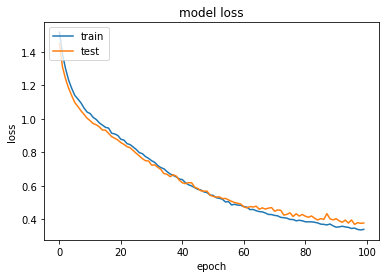

In [64]:
# Plotting the Train Valid Loss Graph

plt.plot(cnnhistory.history['loss'])
plt.plot(cnnhistory.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [65]:
# Saving the model.json

import json
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)

In [66]:
#Loading the model

# loading json and creating model
from keras.models import model_from_json
json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)

# load weights into new model
loaded_model.load_weights("model/aug_noiseNshift_2class2_np.h5")
print("Loaded model from disk")
 
# evaluate loaded model on test data
loaded_model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
score = loaded_model.evaluate(x_testcnn, y_test, verbose=0)
print("%s: %.2f%%" % (loaded_model.metrics_names[1], score[1]*100))

Loaded model from disk
accuracy: 86.57%


Selecting the audio file from Testing Data to evaluate performance

In [69]:
audio_path = "/content/drive/MyDrive/Testing Data/sleepiness_1-28_0001_josh.wav"

Predicting of emotion data on data set

In [94]:
# Predicting emotion on test data
test = extract_feature(audio_path,mfcc = 'true', chroma = 'true', mel = 'true' )

test_valid = x.tolist()
test_valid = np.array(test_valid)
test_valid_lb = np.array(y)
lb = LabelEncoder()
test_valid_lb = np_utils.to_categorical(lb.fit_transform(test_valid_lb))
test_valid = np.expand_dims(test_valid, axis=2)

In [71]:
preds = loaded_model.predict(test_valid, 
                         batch_size=16, 
                         verbose=0)

In [72]:
preds

array([[4.26540105e-03, 1.09179527e-01, 8.86221290e-01, 1.45915998e-04,
        1.87920494e-04],
       [3.45715758e-04, 2.34065019e-02, 9.76060450e-01, 1.86125370e-04,
        1.20071434e-06],
       [1.24115613e-03, 1.95457768e-02, 9.79124129e-01, 7.96042659e-05,
        9.29111411e-06],
       ...,
       [1.78215969e-02, 2.13645268e-02, 8.51990073e-04, 9.57703114e-01,
        2.25877319e-03],
       [9.77818295e-03, 1.02529526e-01, 7.45185418e-04, 8.83719444e-01,
        3.22767487e-03],
       [5.46926982e-04, 1.98610160e-05, 2.11848075e-07, 9.99402165e-01,
        3.08888375e-05]], dtype=float32)

In [73]:
preds1=preds.argmax(axis=1)

In [74]:
preds1

array([2, 2, 2, ..., 3, 3, 3])

In [75]:
abc = preds1.astype(int).flatten()

In [76]:
predictions = (lb.inverse_transform((abc)))
print(predictions)

['anger' 'anger' 'anger' ... 'neutral' 'neutral' 'neutral']


Calculating loss and accuracy of CNN model used for predicting emotions

In [81]:
loss_v, accuracy_v = model.evaluate(x_testcnn, y_test, verbose=1)
print("Validation: accuracy = %f  ;  loss_v = %f" % (accuracy_v, loss_v))
#print("Test: accuracy = %f  ;  loss = %f" % (accuracy, loss))
#model.save("model.h5")
scores = list()
scores.append(accuracy_v)
print(scores)


52/52 [==============================] - 3s 52ms/step - loss: 0.3779 - accuracy: 0.8585
Validation: accuracy = 0.858519  ;  loss_v = 0.377925
[0.8585189580917358]


Finding mean, standard deviation and accuracy

In [82]:
print('CNN accuracy: %.1f%% +/-(%.3f)' % (np.mean(scores*100), np.std(scores)))


CNN accuracy: 0.9% +/-(0.000)


Multilayer Perceptron Layer Algorithm is used to predict the emotions

In [83]:
model1 = Sequential()
model1.add(Dense(200, activation='relu'))
model1.add(Dense(60, activation='relu'))
model1.add(Dense(num_classes, activation='softmax'))

model1.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

#scores1 = cross_val_score(model1, x, y, scoring = 'accuracy', cv = xxx, n_jobs = -1)
model1=MLPClassifier(alpha=0.01, batch_size=256, epsilon=1e-08, hidden_layer_sizes=(300,), learning_rate='adaptive', max_iter=500)

train = model1.fit(x_train , y_train)
y_pred=model1.predict(x_test)

In [85]:
#DataFlair - Calculate the accuracy of our model
accuracy=accuracy_score(y_true=y_test, y_pred=y_pred)
print(accuracy)
#DataFlair - Print the accuracy
scores1 = list()
scores1.append(accuracy)

0.9145093317278747


Finding mean, standard deviation and accuracy

In [86]:
print('MLP accuracy: %.1f%% +/-(%.3f)' % (np.mean(scores1*100), np.std(scores1)))


MLP accuracy: 0.9% +/-(0.000)


Comparing the result of both CNN and MLP algorithm used

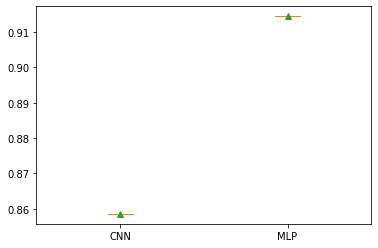

In [87]:
plt.boxplot([scores,scores1], labels=['CNN','MLP'], showmeans=True)
plt.show()

Deployment using MLP algorithm using Testing Data

In [116]:
audio_path = "/content/drive/MyDrive/Testing Data/amused_1-28_0001_sam.wav"


def predict_proba(self, audio_path):
        """
        Predicts the probability of each emotion.
        """
        #if self.classification:
feature = extract_feature(audio_path,mfcc = 'true', chroma = 'true', mel = 'true' ).reshape(1, -1)
proba = (feature)[0]
print(proba)
result = {}


print(model1.classes_)
for observed_emotions, prob in zip(model1.classes_, proba):
        result[observed_emotions] = prob
        abc = model1.classes_.astype(int).flatten()
        result = (lb.inverse_transform((abc)))
print(result)



def predict(self, audio_path):
        """
        given an `audio_path`, this method extracts the features
        and predicts the emotion
        """
        feature = extract_feature(audio_path, **self.audio_config).reshape(1, -1)
        #abc = feature.astype(int).flatten()
        #model1.predict(feature)[0]= (lb.inverse_transform((abc)))
        return self.model1.predict(feature)[0]
print(model1.predict(feature)[0])

[-2.70388642e+02  5.97823241e+01 -4.37208427e+00  3.25338444e+01
  5.18150678e+00 -4.82782976e+00 -1.13456818e+01 -1.38842431e+01
 -9.05024992e+00  9.04207016e+00 -8.26843943e+00  6.57844977e+00
  2.40688682e+00  5.12623799e+00  4.18810070e+00 -5.43209114e-01
  2.18631653e+00 -4.65996354e+00 -1.10560070e+00 -6.23004021e-02
 -2.93394571e+00 -4.38967923e+00 -1.90603252e-01  9.71754507e-01
  2.35255858e+00  2.46702538e+00 -8.84212788e-01  7.80006402e-01
  1.48740995e+00 -1.02482424e+00 -2.99089529e+00  5.44786003e-01
  1.07440791e+00  2.55458357e+00  2.18643869e+00  2.43096446e+00
  1.95372344e+00  4.41135357e+00  1.49825145e+00  3.24301852e+00
  5.67465690e-01  5.08088002e-01  5.11380170e-01  5.59517460e-01
  6.52415275e-01  6.67683736e-01  6.31564139e-01  6.50180371e-01
  6.79484380e-01  6.72870057e-01  6.73514547e-01  6.39689136e-01
  1.10913401e+00  2.44817978e-01  3.36809849e-02  1.70658644e-01
  3.01744852e+00  9.17644348e+00  1.54400775e+01  2.32667497e+01
  1.13855462e+01  1.49732